In [3]:
!conda install -y pyarrow s3fs seaborn

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.12
  latest version: 4.7.12

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/ec2-user/anaconda3/envs/tensorflow_p36

  added / updated specs: 
    - pyarrow
    - s3fs
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    glog-0.3.5                 |       hf484d3e_1         158 KB
    pyarrow-0.11.1             |   py36he6710b0_0         1.9 MB
    seaborn-0.9.0              |           py36_0         379 KB
    openssl-1.0.2t             |       h7b6447c_1         3.1 MB
    arrow-cpp-0.11.1           |   py36h5c3f529_1         6.7 MB
    libevent-2.1.8             |       h93c0eb6_0         1.4 MB
    lz4-c-1.8.1.2              |       h14c3975_0         158 KB
    gflags-2.2.2               |  

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'
sns.set_context('talk')

In [126]:
prefix = 's3://danylo-ucla/storage/weather/jobs/transform_batch/20191011-190719_1c8448afc019f4d26d394f58f64a33ef'

train_X = pd.read_parquet(f'{prefix}/train_X.parquet')
train_y = pd.read_parquet(f'{prefix}/train_y.parquet')

validate_X = pd.read_parquet(f'{prefix}/validate_X.parquet')
validate_y = pd.read_parquet(f'{prefix}/validate_y.parquet')

test_X = pd.read_parquet(f'{prefix}/test_X.parquet')
test_y = pd.read_parquet(f'{prefix}/test_y.parquet')

score_X = pd.read_parquet(f'{prefix}/score_X.parquet')
score_y = pd.read_parquet(f'{prefix}/score_y.parquet')

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pyarrow/pandas_compat.py:708: FutureWarning: .labels was deprecated in version 0.24.0. Use .codes instead.
  labels = getattr(columns, 'labels', None) or [
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pyarrow/pandas_compat.py:735: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  return pd.MultiIndex(levels=new_levels, labels=labels, names=columns.names)
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pyarrow/pandas_compat.py:752: FutureWarning: .labels was deprecated in version 0.24.0. Use .codes instead.
  labels, = index.labels


In [7]:
condition_window = 24
prediction_window = 24
features_length = 4

In [8]:
train_X.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 826464 entries, (Albuquerque/1108/0, 2015-02-16 09:00:00) to (Vancouver/806/12, 2014-07-03 04:00:00)
Data columns (total 4 columns):
humidity       826464 non-null float64
pressure       826464 non-null float64
temperature    826464 non-null float64
wind_speed     826464 non-null float64
dtypes: float64(4)
memory usage: 30.4+ MB


In [9]:
train_X.head()

humidity  pressure  temperature  \
sample             time                                                   
Albuquerque/1108/0 2015-02-16 09:00:00      47.0    1031.0   276.323000   
                   2015-02-16 10:00:00      45.0    1032.0   275.097667   
                   2015-02-16 11:00:00      48.0    1032.0   273.931333   
                   2015-02-16 12:00:00      46.0    1033.0   274.380000   
                   2015-02-16 13:00:00      51.0    1033.0   272.675333   

                                        wind_speed  
sample             time                             
Albuquerque/1108/0 2015-02-16 09:00:00         3.0  
                   2015-02-16 10:00:00         3.0  
                   2015-02-16 11:00:00         2.0  
                   2015-02-16 12:00:00         2.0  
                   2015-02-16 13:00:00         1.0

In [10]:
train_X.groupby('sample').size().head()

sample
Albuquerque/1108/0    24
Albuquerque/1108/1    24
Albuquerque/1108/2    24
Albuquerque/1112/0    24
Albuquerque/1112/1    24
dtype: int64

In [11]:
train_X.loc['Albuquerque/1112/1'].head()

,humidity,pressure,temperature,wind_speed
time,,,,
2015-02-20 18:00:00,46.0,1023.0,282.116500,3.0
2015-02-20 19:00:00,40.0,1021.0,287.061667,4.0
2015-02-20 20:00:00,38.0,1019.0,288.236333,4.0
2015-02-20 21:00:00,35.0,1020.0,286.928000,4.0
2015-02-20 22:00:00,34.0,1017.0,288.930333,5.0


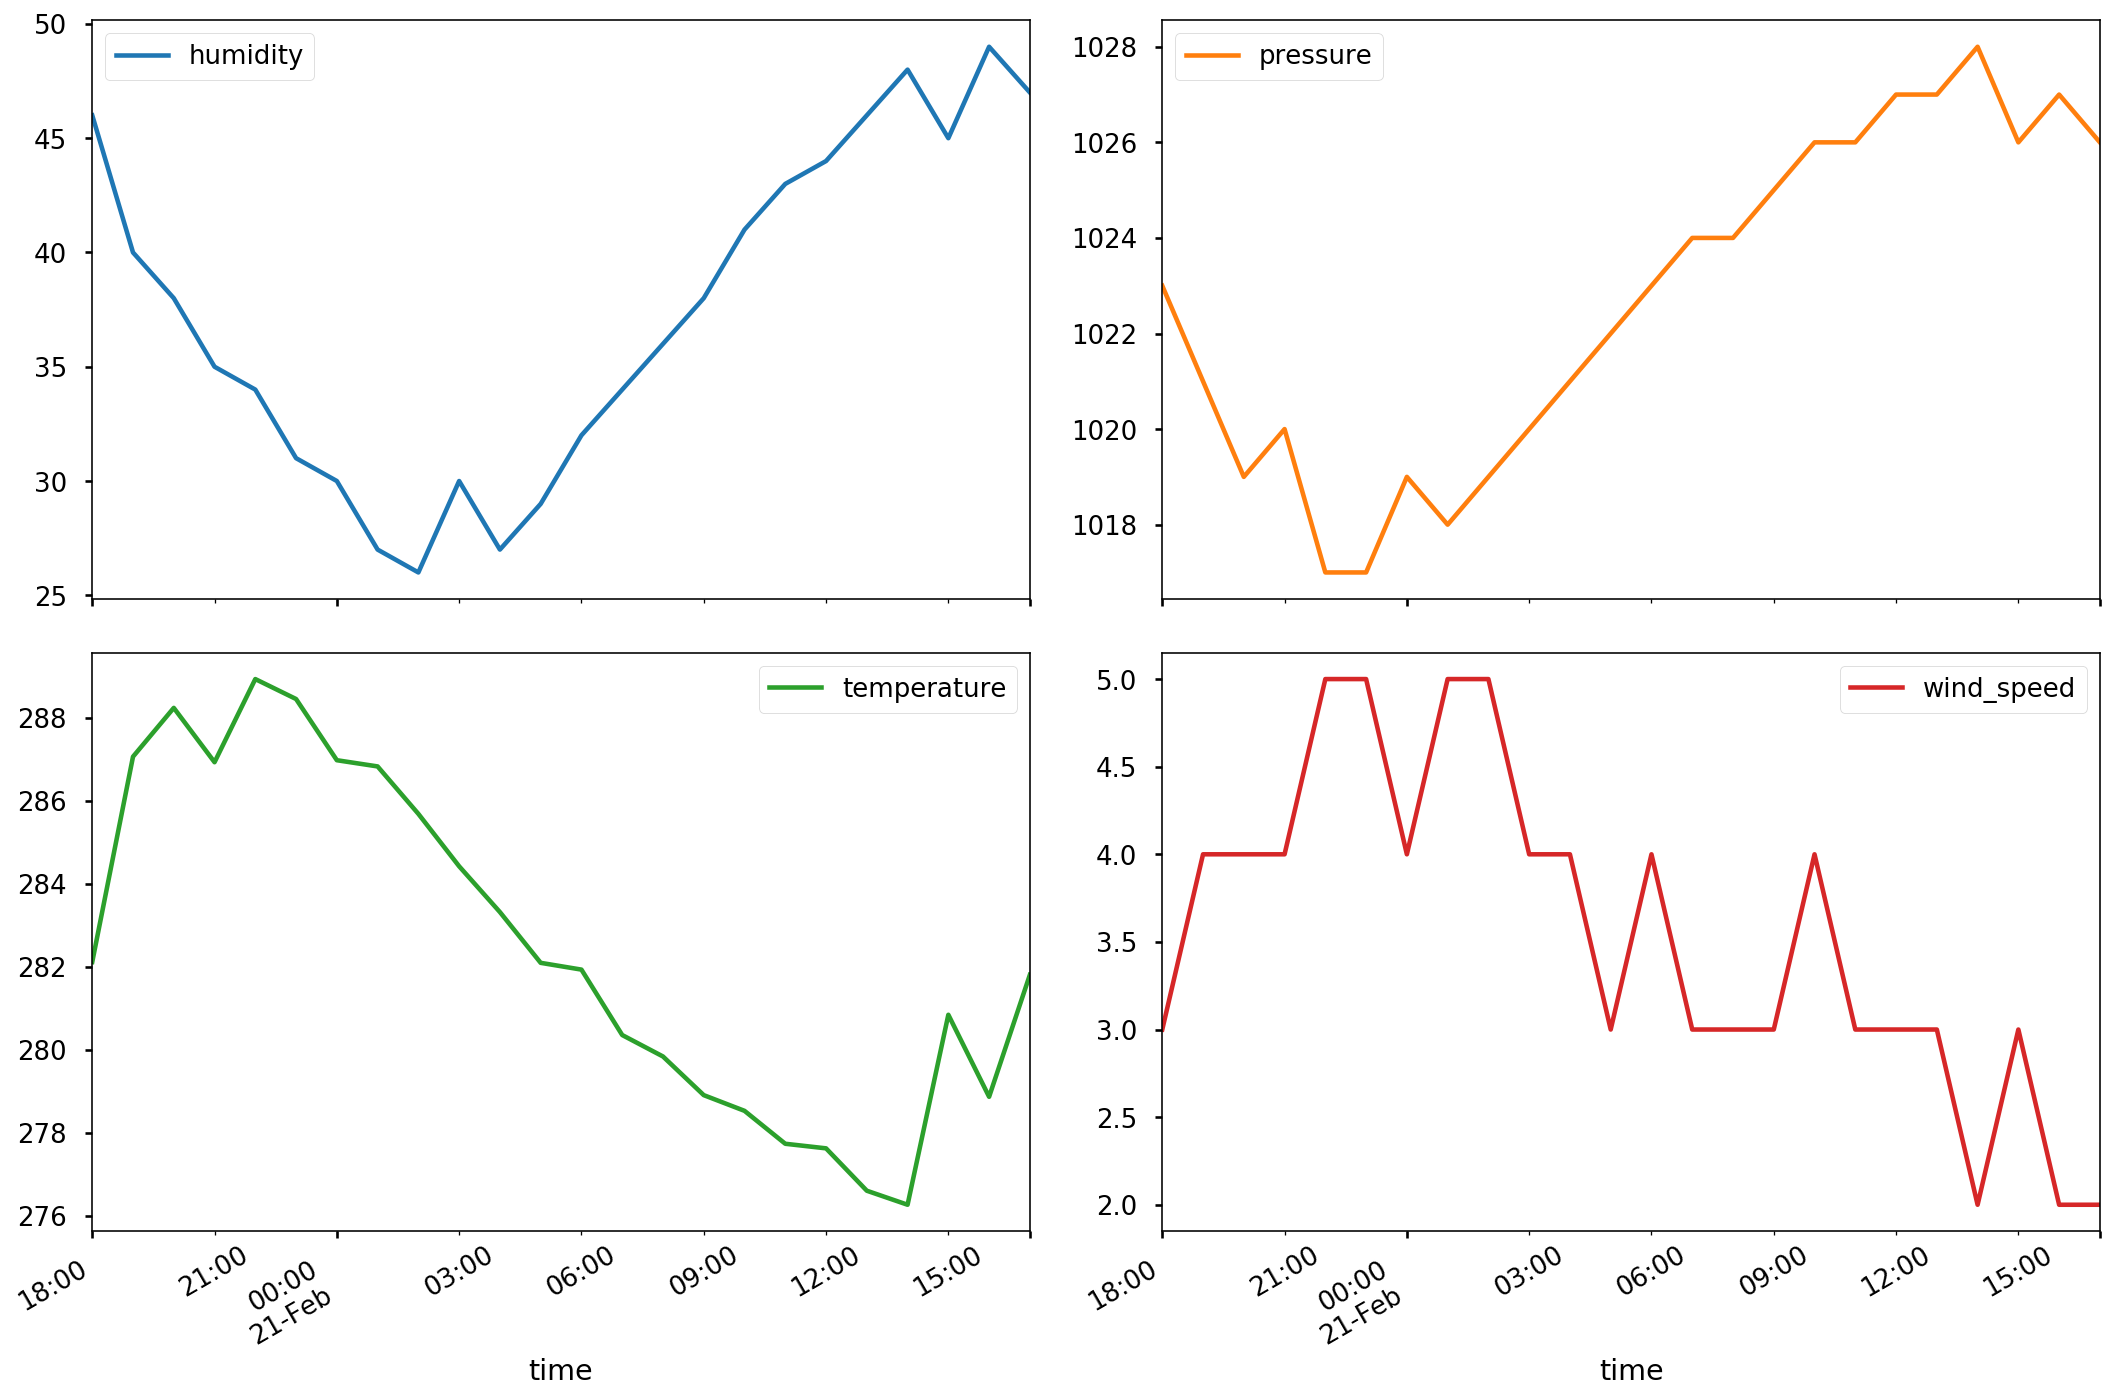

In [12]:
train_X.loc['Albuquerque/1112/1'].plot(subplots=True, layout=(2, 2), figsize=[15, 10])
plt.tight_layout()

In [90]:
from sklearn.preprocessing import StandardScaler

non_trainable_segments = segments[1:]
scaler = StandardScaler()

scaled_dataset = {
    'train': scaler.fit_transform(train_X.values)
}
train_X_scaled = 

validate_X_scaled = scaler.transform(validate_X.values)

In [99]:
# Keras RNN cells expect inputs with 3 dimensions:
# (batch_size, condition_window, features_length)
# Each RNN cell takes a vector of features_length
# at each time step of condition_window.
# Internal RNN cell state is reset between different batch samples.

# Let's review current shapes of the input, and the desired shapes.

def expected_X_shape(actual_X_shape):
    return (int(actual_X_shape[0]/condition_window), condition_window, features_length)

def expected_y_shape(actual_y_shape):
    return (int(actual_y_shape[0]/prediction_window), prediction_window)

def report_shapes(train_X, train_y, validate_X, validate_y):
    return pd.DataFrame({
        'actual shape': [
            train_X.shape, 
            train_y.shape,
            validate_X.shape,
            validate_y.shape,
        ],
        'expected shape': [
            expected_X_shape(train_X.shape), 
            expected_y_shape(train_y.shape), 
            expected_X_shape(validate_X.shape), 
            expected_y_shape(validate_y.shape), 
        ],
    }, index=['train_X', 'train_y', 'validate_X', 'validate_y'])

In [100]:
report_shapes(train_X_scaled, train_y, validate_X_scaled, validate_y)

,actual shape,expected shape
train_X,"(826464, 4)","(34436, 24, 4)"
train_y,"(826464, 4)","(34436, 24)"
validate_X,"(54912, 4)","(2288, 24, 4)"
validate_y,"(54912, 4)","(2288, 24)"


In [94]:
# Exepected shape can be achieved with a simple reshape call.
# Note that these are not Pandas data frames any more,
# but Numpy n-dimensional arrays.
# https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html

def frame_to_ndarray(frame_X, frame_y):
    X_nd = frame_X.reshape(-1, condition_window, features_length)
    y_nd = frame_y['temperature'].values.reshape(-1, prediction_window)
    return X_nd, y_nd

train_X_nd, train_y_nd = frame_to_ndarray(train_X_scaled, train_y)
validate_X_nd, validate_y_nd = frame_to_ndarray(validate_X_scaled, validate_y)

In [105]:
# Let's confirm the expected shape.
# Transforming other parts of the dataset (validate, test, and score)
# is part of the assignment scope.

pd.DataFrame({
    'actual shape': [
        train_X_nd.shape, 
        train_y_nd.shape,
        validate_X_nd.shape,
        validate_y_nd.shape,
    ]},
    index=['train_X', 'train_y', 'validate_X', 'validate_y']
)

,actual shape
train_X,"(34436, 24, 4)"
train_y,"(34436, 24)"
validate_X,"(2288, 24, 4)"
validate_y,"(2288, 24)"


In [82]:
from tensorflow.python.keras.layers.recurrent import GRU
from tensorflow.python.keras.layers import Dense, CuDNNGRU, BatchNormalization
from tensorflow.python.keras.models import Sequential
from tensorflow.python import GlorotUniform

layers = [
        CuDNNGRU(
            input_shape=(condition_window, features_length),
            units=256,
            return_sequences=True,
            kernel_initializer=GlorotUniform(seed=42)
        ),
        BatchNormalization(),
        CuDNNGRU(
            units=128,
            return_sequences=True,
            kernel_initializer=GlorotUniform(seed=42)
        ),
        BatchNormalization(),
        CuDNNGRU(
            units=64,
            return_sequences=False,
            kernel_initializer=GlorotUniform(seed=42)
        ),
        BatchNormalization(),
        Dense(
            units=32,
            activation='relu'
        ),
        BatchNormalization(),
        Dense(
            units=prediction_window,
            activation='linear'
        )
]

model = Sequential(layers)

In [106]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
cu_dnngru_22 (CuDNNGRU)      (None, 24, 256)           201216    
_________________________________________________________________
batch_normalization_26 (Batc (None, 24, 256)           1024      
_________________________________________________________________
cu_dnngru_23 (CuDNNGRU)      (None, 24, 128)           148224    
_________________________________________________________________
batch_normalization_27 (Batc (None, 24, 128)           512       
_________________________________________________________________
cu_dnngru_24 (CuDNNGRU)      (None, 64)                37248     
_________________________________________________________________
batch_normalization_28 (Batc (None, 64)                256       
_________________________________________________________________
dense_32 (Dense)             (None, 32)              

In [85]:
from utils import *
from tensorflow.python.keras.optimizers import Adam

model.compile(
    optimizer=Adam(lr=0.01),
    loss='mean_squared_error',
    metrics=[
        'mean_absolute_error',
        r2_score,
        mean_error
    ]
)

In [86]:
from tensorflow.python.keras.callbacks import TerminateOnNaN, ReduceLROnPlateau, EarlyStopping

history = model.fit(
    train_X_nd,
    train_y_nd,
    epochs=20,
    batch_size=100,
    callbacks=[
        TerminateOnNaN(),
        ReduceLROnPlateau(
            monitor='loss',
            min_delta=0.1,
            patience=5,
            cooldown=10,
            verbose=1
        ),
        EarlyStopping(
            monitor='loss',
            min_delta=0.1,
            patience=10
        )
    ]
)

Epoch 1/20
34436/34436 [==============================] - 16s 467us/sample - loss: 13548.4041 - mean_absolute_error: 81.9966 - r2_score: -100.0183 - mean_error: -81.0456
Epoch 2/20
34436/34436 [==============================] - 14s 399us/sample - loss: 23.1513 - mean_absolute_error: 3.7800 - r2_score: 0.8281 - mean_error: -0.0177
Epoch 3/20
34436/34436 [==============================] - 14s 393us/sample - loss: 21.4914 - mean_absolute_error: 3.6219 - r2_score: 0.8401 - mean_error: 0.0033
Epoch 4/20
34436/34436 [==============================] - 13s 391us/sample - loss: 19.5227 - mean_absolute_error: 3.4273 - r2_score: 0.8550 - mean_error: -0.0048
Epoch 5/20
34436/34436 [==============================] - 14s 393us/sample - loss: 18.3344 - mean_absolute_error: 3.2988 - r2_score: 0.8626 - mean_error: -0.0224
Epoch 6/20
34436/34436 [==============================] - 14s 392us/sample - loss: 17.4653 - mean_absolute_error: 3.1941 - r2_score: 0.8701 - mean_error: 0.0118
Epoch 7/20
34436/34436

2288/2288 [==============================] - 1s 630us/sample - loss: 18.9020 - mean_absolute_error: 3.2808 - r2_score: -0.1259 - mean_error: 0.5438


[18.901970946705426, 3.2807755, -0.12593569, 0.5437881]

In [122]:
# Note that Keras evaluates metrics in batches,
# which is okay for averaging-stable metrics like ME, MSE, and MAE,
# but R2 requires full dataset to evaluate precisely.

# This implies two things:
# 1) R2 as reported during training is not precise
# 2) when evaluating after training, batch size must match dataset size

metrics_by_segment = {
    segment: model.evaluate(
        X_nd, 
        y_nd, 
        verbose=0, 
        batch_size=X_nd.shape[0]
    )
    for segment, (X_nd, y_nd) in {
        'train': (train_X_nd, train_y_nd),
        'validate': (validate_X_nd, validate_y_nd)
    }.items()
}

pd.concat([
    pd.DataFrame(data=[metrics], columns=['MSE', 'MAE', 'R2', 'ME'], index=[segment])
    for segment, metrics in metrics_by_segment.items()
])

,MSE,MAE,R2,ME
train,9.919519,2.347465,0.927719,0.102020
validate,18.901972,3.280775,0.785646,0.556427
